In [1]:
import pandas as pd

data = pd.read_csv("data-export.csv")

print(data.head())

          # ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737

In [3]:
new_header = data.iloc[0]  # grab the first row for the header
data = data[1:]  # take the data less the header row
data.columns = new_header  # set the header row as the df header
data.reset_index(drop=True, inplace=True)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3181 entries, 0 to 3180
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Direct              3181 non-null   object
 1   2024041623          3181 non-null   object
 2   237                 3181 non-null   object
 3   300                 3181 non-null   object
 4   144                 3181 non-null   object
 5   47.526666666666700  3181 non-null   object
 6   0.6075949367088610  3181 non-null   object
 7   4.673333333333330   3181 non-null   object
 8   0.48                3181 non-null   object
 9   1402                3181 non-null   object
dtypes: object(10)
memory usage: 248.6+ KB


In [5]:
print(data.describe())

0               Direct  2024041623   237   300   144 47.526666666666700  \
count             3181        3181  3181  3181  3181               3181   
unique               7         672   146   179   102               2822   
top     Organic Social  2024042116     1     1     0                  0   
freq               672           6   335   340   393                170   

0      0.6075949367088610 4.673333333333330  0.48  1402  
count                3181              3181  3181  3181  
unique                808              2024   986   677  
top                     0                 1     0     1  
freq                  393               133   393   115  


In [11]:
import pandas as pd

# Read the CSV again, skipping the first row (which is a visual separator)
data = pd.read_csv("data-export.csv", skiprows=1)

# Rename columns for easier access
data.columns = ['Channel Group', 'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions',
                'Engaged sessions', 'Avg engagement time', 'Engaged sessions per user',
                'Events per session', 'Engagement rate', 'Event count']

# Convert data types
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'], errors='coerce')
data['Sessions'] = pd.to_numeric(data['Sessions'], errors='coerce')

# Group by date and sum Users and Sessions
grouped_data = data.groupby('Date + hour (YYYYMMDDHH)')[['Users', 'Sessions']].sum()

grouped_data.head()


,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102


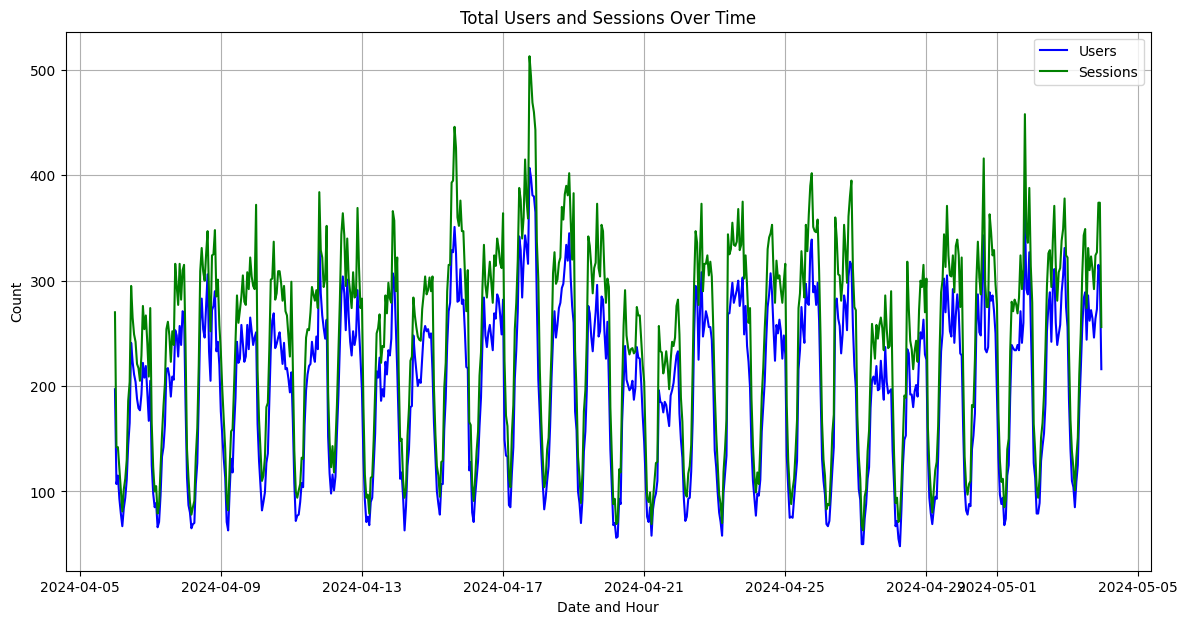

In [12]:
import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

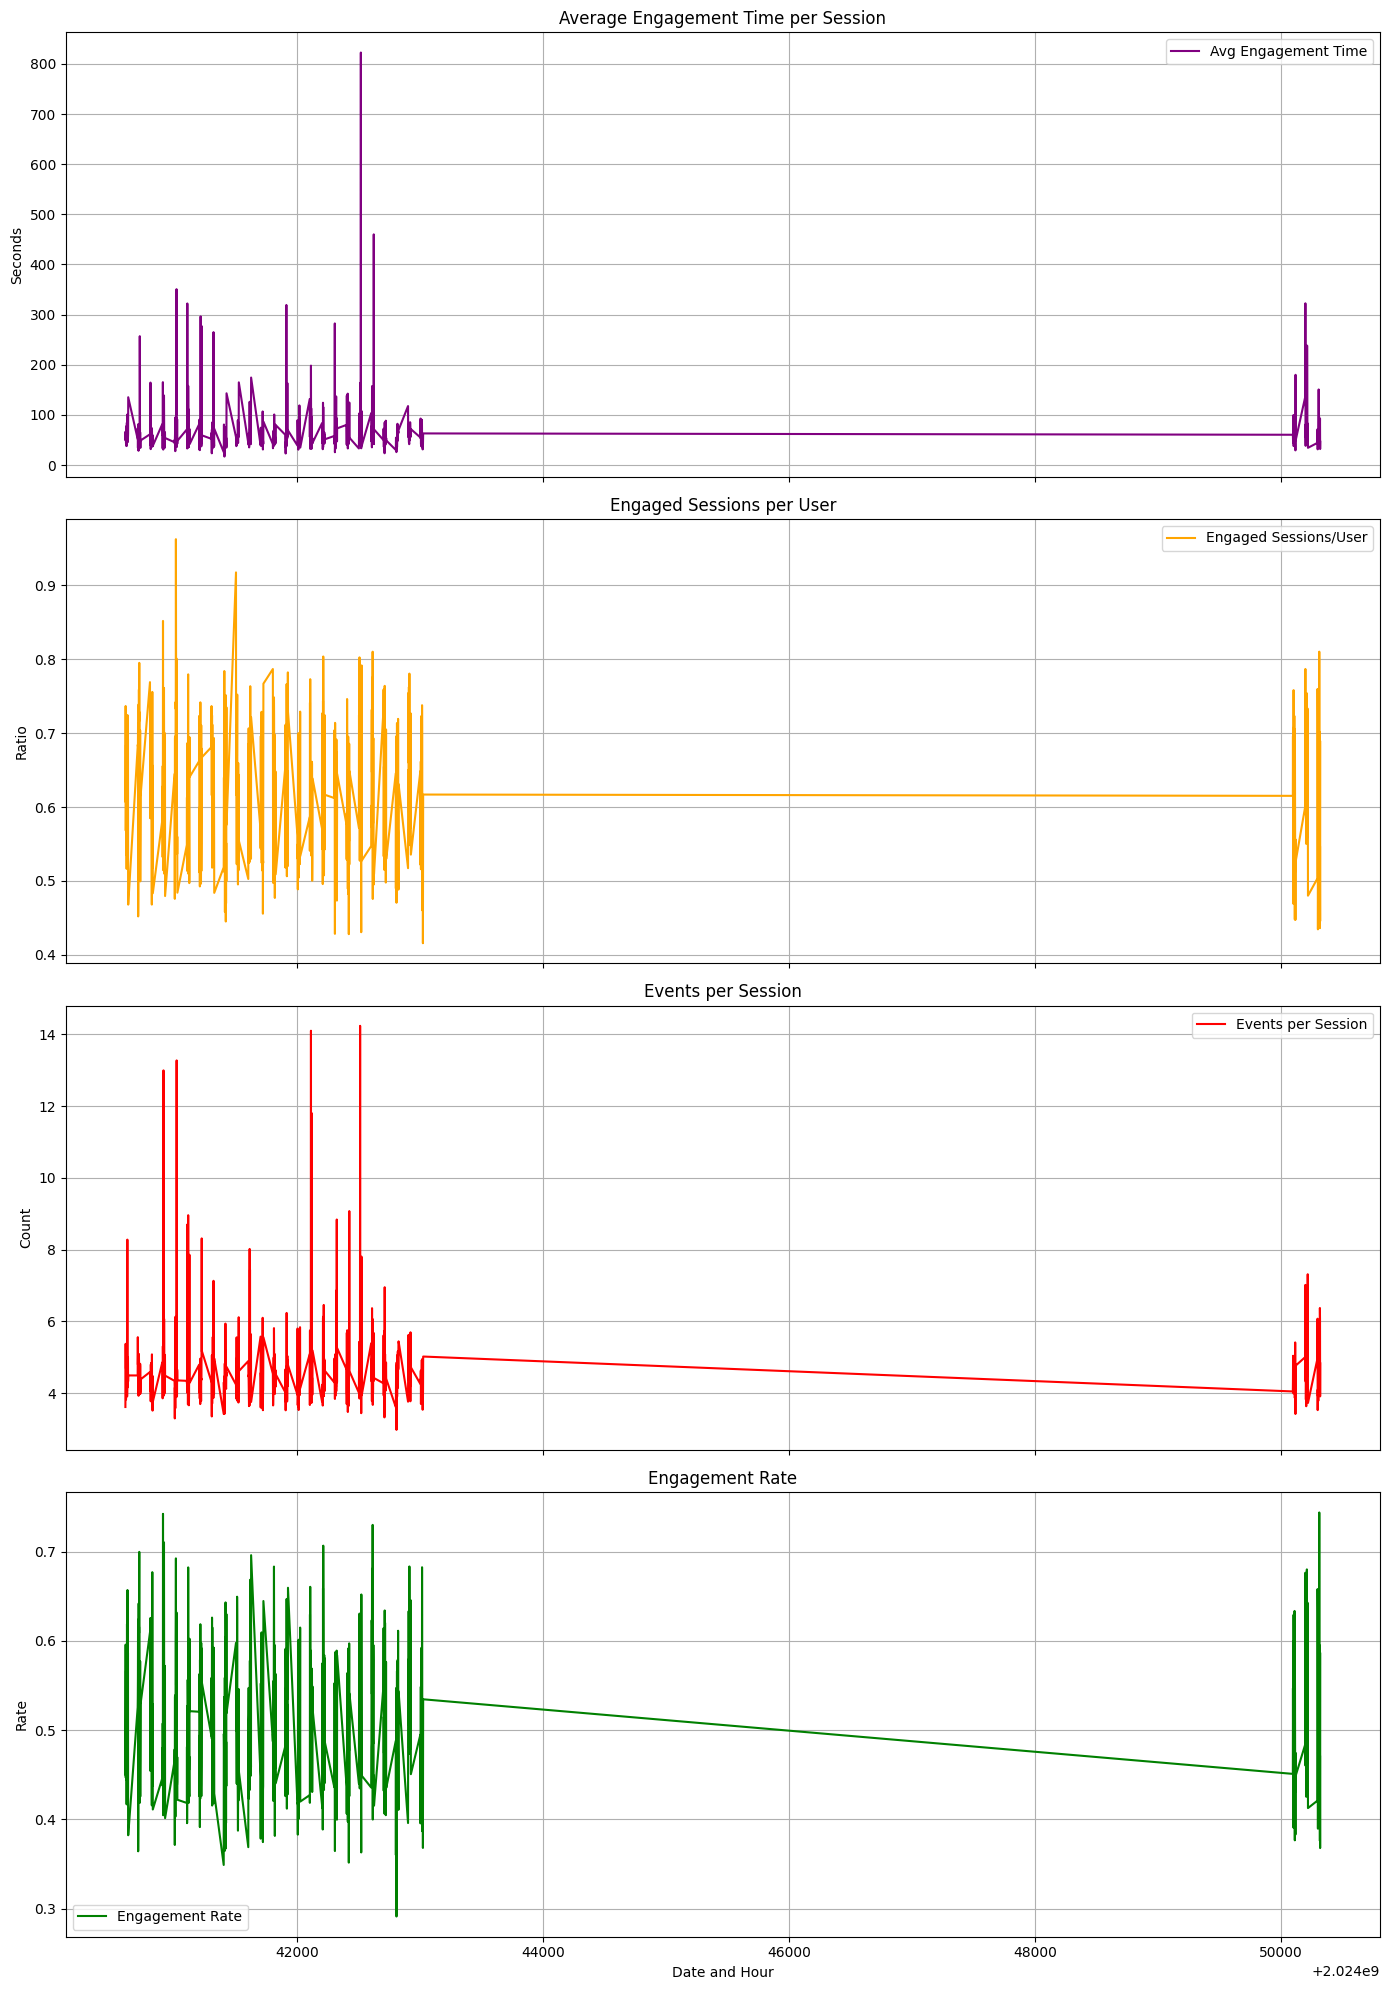

In [17]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

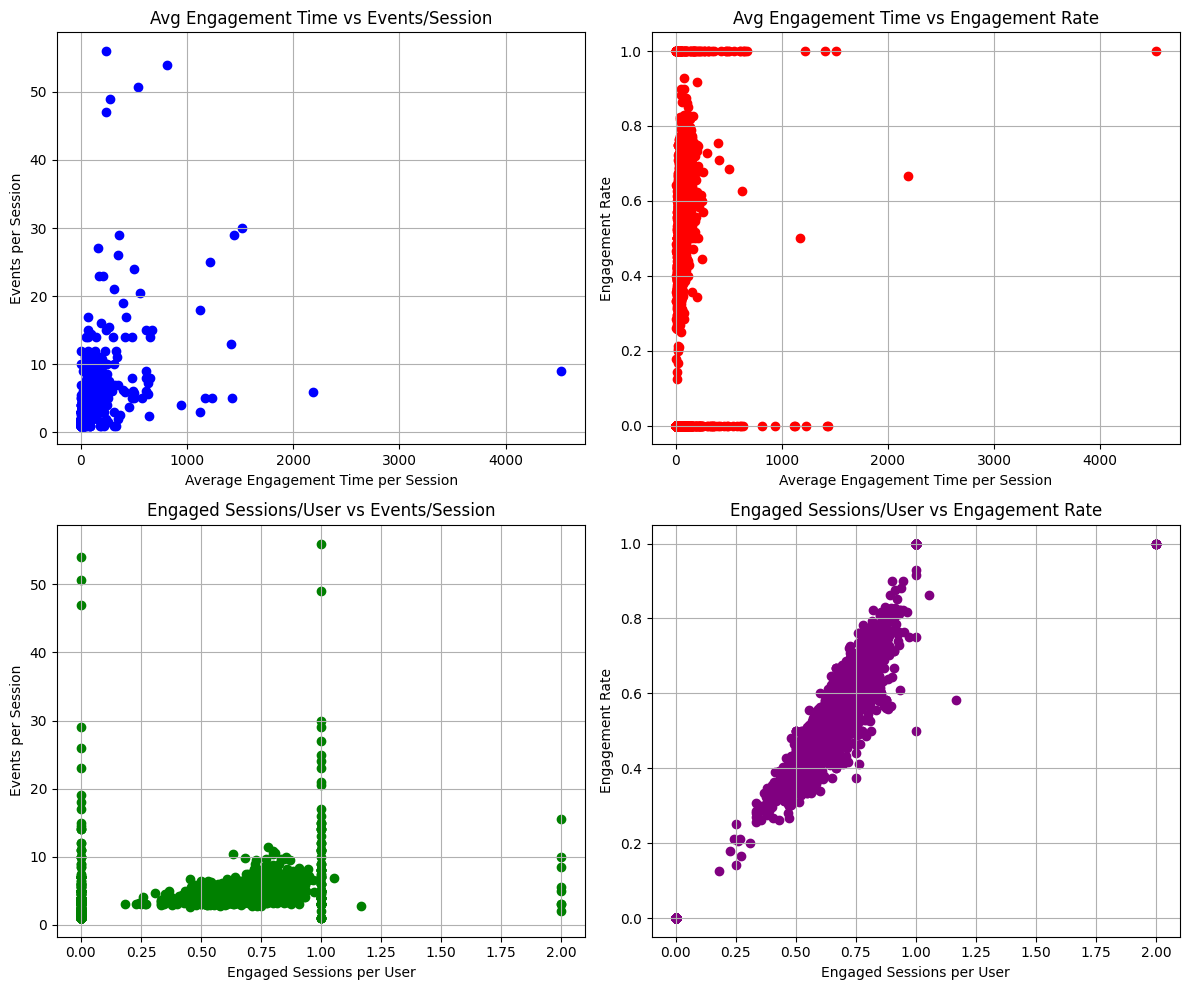

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

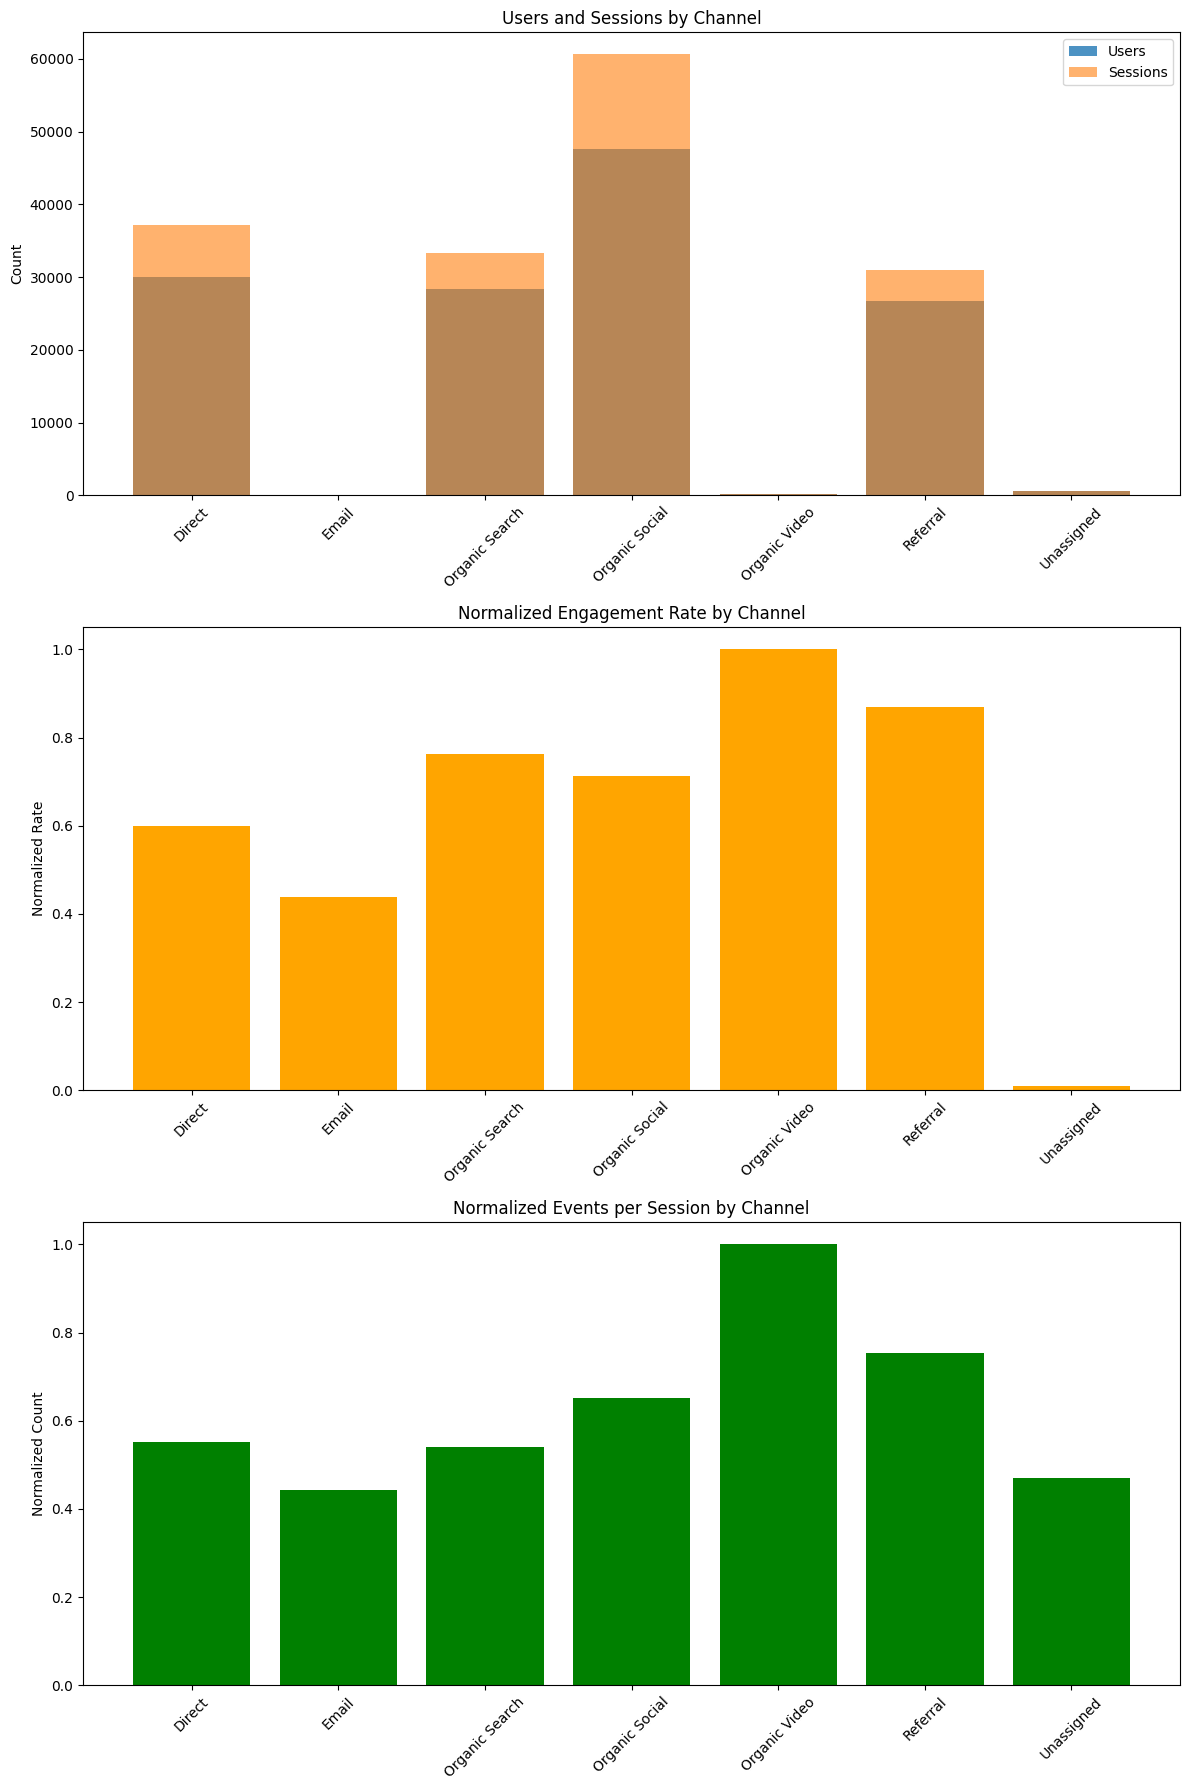

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read and clean data
data = pd.read_csv("data-export.csv", skiprows=1)
data.columns = ['Session primary channel group (Default channel group)', 'Date + hour (YYYYMMDDHH)', 'Users', 'Sessions',
                'Engaged sessions', 'Average engagement time per session',
                'Engaged sessions per user', 'Events per session',
                'Engagement rate', 'Event count']

# Remove bad rows where date is not numeric
data = data[data['Date + hour (YYYYMMDDHH)'].astype(str).str.match(r'^\d{10}$')]

# Convert numeric columns
cols_to_numeric = ['Users', 'Sessions', 'Engaged sessions', 'Engagement rate', 'Events per session']
for col in cols_to_numeric:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Group by channel and aggregate metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# Normalize for comparison
channel_performance['Normalized Engagement Rate'] = (
    channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
)
channel_performance['Normalized Events per Session'] = (
    channel_performance['Events per session'] / channel_performance['Events per session'].max()
)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Users and Sessions
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()
ax[0].tick_params(axis='x', rotation=45)

# Engagement Rate
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')
ax[1].tick_params(axis='x', rotation=45)

# Events per Session
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')
ax[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


/tmp/ipython-input-4216953234.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
/tmp/ipython-input-4216953234.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


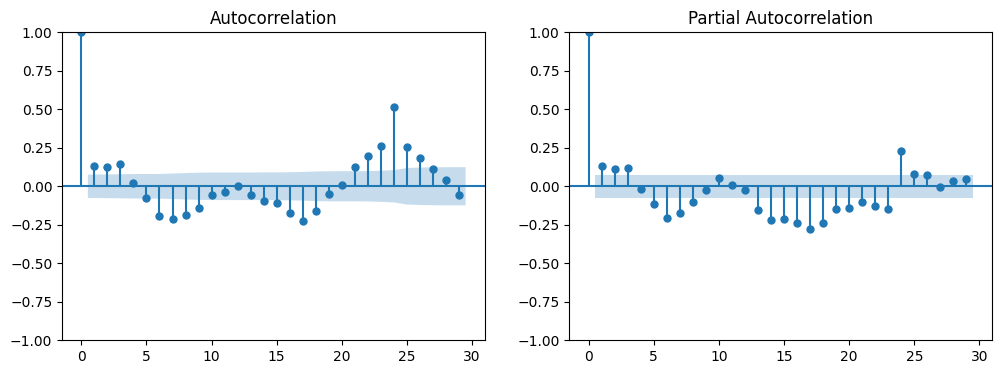

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

/tmp/ipython-input-1018664902.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
/tmp/ipython-input-1018664902.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
/tmp/ipython-input-1018664902.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')


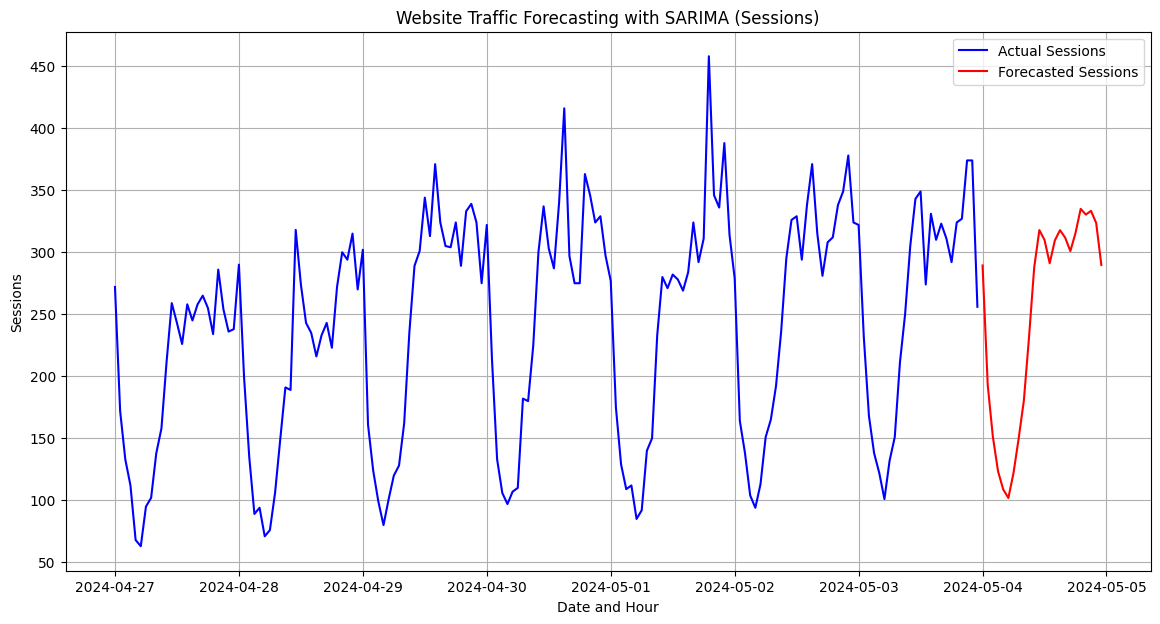

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()